In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import cv2
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.ndimage import convolve
from matplotlib import colors
from scipy import interpolate
from scipy.interpolate import BSpline
from scipy.interpolate import make_interp_spline
from scipy.interpolate import make_lsq_spline
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.transforms import Bbox
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import IMPERIAL_LENGTH
from matplotlib_scalebar.scalebar import ScaleBar

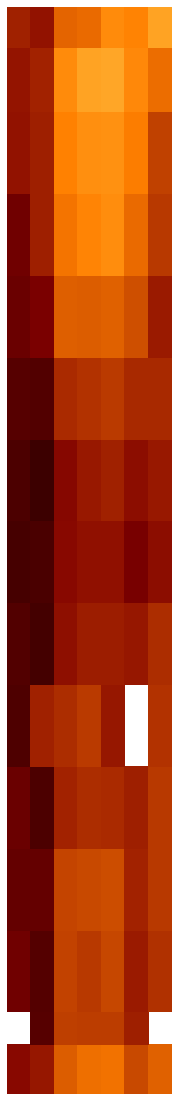

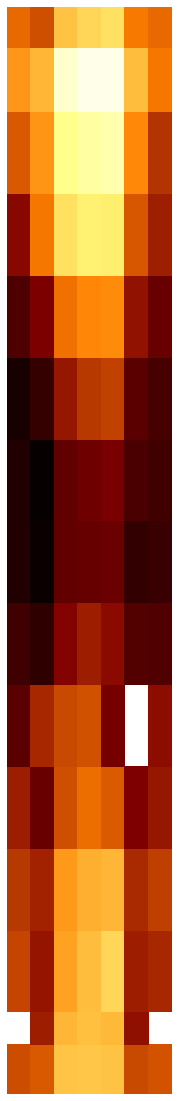

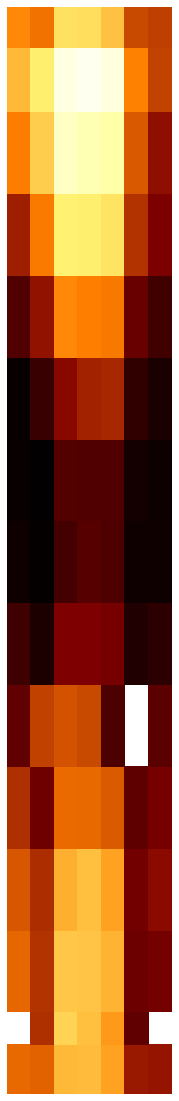

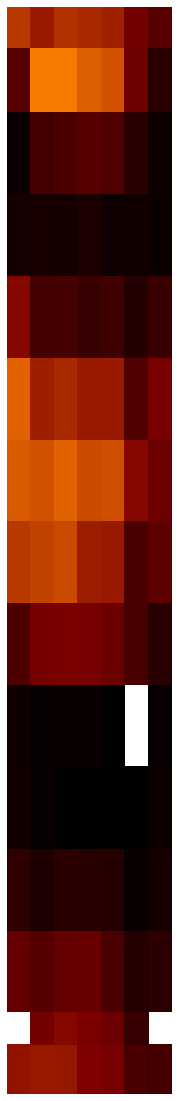

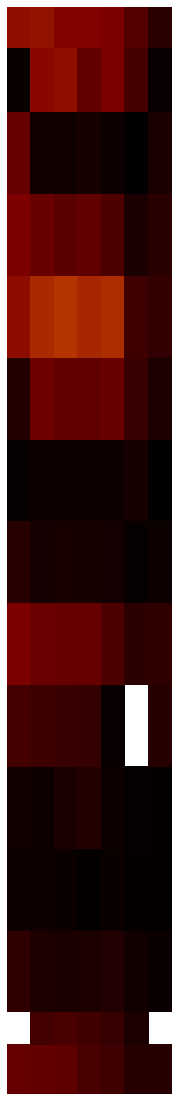

In [5]:
# ------------Keep it------------------------------#
error=0.00075
lower=400
upper=950
alanum=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
albnum=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sionum=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sianum=[0,100,250,500,750,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sibnum=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
numbers=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
# ------------Keep it------------------------------#

#Posiiton of the Data if you don't want the 0nm data just delete the '0000'
number=['0000','0100','0250','0500','0750']
z=0

#put the desied energy level into the xzs, or you can use np.linspace(min,max,(how many number you want))
xzs=[0.1,0.133,0.154,0.295,0.44]

#the horizontal position in the color map
pos=np.array([0,10,20,30,40,50,60,70])

#the vertical position in the color map
numbers=np.array([0,150,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100])
total={}
RR=0
for x in xzs:
    for k in ['AL-B','AL-A','SiO2-A','SiO2-B','SiO2-C','SiC-A','SiC-B']:
            ys=[]
            yns=[]
            xs=[]
            for j in number:
                z+=1
                try:
                    df=pd.read_table('3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j))
                    df.columns=['energyloss','intensity']
                    E=df['energyloss'][lower:upper]
                    I=df['intensity'][lower:upper]
                    df.set_index('energyloss',inplace=True)
                    Tcx=[]
                    Tcy=[]
                    # Using the linear regression to find the two near point and construct the linear line and find the intensity to according energy
                    for column in df.index:
                        if column>(-error+x) and column<(x+error):
                            y=df.loc[column].values[0]
                            RR+=1
                            Tcx.append(column)
                            Tcy.append(y)
                            if RR==2:
                                RR=0
                                break
                    Newy=((Tcy[1]-Tcy[0])/(Tcx[1]-Tcx[0])*x+(Tcy[1]-((Tcy[1]-Tcy[0])*Tcx[1])/(Tcx[1]-Tcx[0])))
                    ys.append(Newy)
                except Exception as e:
                    ys.append(np.nan)
                    pass
            total['{}'.format(k)]=ys
    #the size of the color map in (inch)
    fig= plt.figure(figsize=(2.95,20))
    ax=fig.add_subplot(1,1,1)
    
    #The multiplication factor
    df2=DataFrame(total)*(x)**0.5*4.5
    df1=df2
    
    #color map plotting 
    img=plt.pcolor(pos,numbers,df1.values,cmap='afmhot',vmin=0,vmax=0.1)
    plt.axis('off')
    
    #The label
    textstr='{} meV'.format("%.0f" % (x*1000))
    
    #Save the figure 
    plt.savefig('TEEL={}eV.png'.format("%.0f" % (x*1000)),bbox_inches='tight')

In [29]:
# Raw Data Video Formation
import cv2
import numpy as np
import glob
img_array = []
font= cv2.FONT_HERSHEY_SIMPLEX 
for i in range(450):
    for filename in glob.glob('TEEL={}eV.png'.format("%.0f" % (xzs[i]*1000))):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height) 
        img_array.append(img)
out = cv2.VideoWriter('R450_60x240_Fr17.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 17, size)
display(len(img_array))
for j in range(len(img_array)):
    out.write(img_array[j])
out.release()

450